In [77]:
import os
from dotenv import load_dotenv
load_dotenv()
from agno.agent import Agent
import datetime
from agno.models.openai import OpenAILike
import json
import httpx

#------------------ settings ------------------
api_key=os.getenv("DEEPSEEK_API_KEY")
base_url=os.getenv("DEEPSEEK_API_BASE_URL")
local_base_url = 'http://192.168.0.166:8000/v1'
local_model_name = 'Qwen3-235B'
model_name = 'deepseek-reasoner'

local_settings = {
  'api_key' : '123',
  'base_url' : local_base_url,
  'id' : local_model_name
}

online_settings = {
  'api_key' : api_key,
  'base_url' : base_url,
  'id' : model_name
}

settings = local_settings
#------------------ settings ------------------

In [4]:
data = {
  "data_list": [
    {"no":9,"first_paragraph":"AI+BIM平台","content":"""BIM协同设计平台Ai审图功能正式上线，提高了模型碰撞检查效率。"""},
    {"no":6,"first_paragraph":"AI+项目管理","content":"""<span style="color:#404040;font-family:quote-cjk-patch, Inter, system-ui, -apple-system, BlinkMacSystemFont, &quot;font-size:16.002px;background-color:#FFFFFF;">进行</span><span style="color:#404040;font-family:quote-cjk-patch, Inter, system-ui, -apple-system, BlinkMacSystemFont, &quot;font-size:16.002px;background-color:#FFFFFF;">物流模块流程梳理</span><span style="color:#404040;font-family:quote-cjk-patch, Inter, system-ui, -apple-system, BlinkMacSystemFont, &quot;font-size:16.002px;background-color:#FFFFFF;">并紧密</span><span style="color:#404040;font-family:quote-cjk-patch, Inter, system-ui, -apple-system, BlinkMacSystemFont, &quot;font-size:16.002px;background-color:#FFFFFF;">配合数字建造平台的建设进程</span><span style="color:#404040;font-family:quote-cjk-patch, Inter, system-ui, -apple-system, BlinkMacSystemFont, &quot;font-size:16.002px;background-color:#FFFFFF;">。同时系统性地</span><span style="color:#404040;font-family:quote-cjk-patch, Inter, system-ui, -apple-system, BlinkMacSystemFont, &quot;font-size:16.002px;background-color:#FFFFFF;">梳理与整合项目管理经济线及对应生产线</span><span style="color:#404040;font-family:quote-cjk-patch, Inter, system-ui, -apple-system, BlinkMacSystemFont, &quot;font-size:16.002px;background-color:#FFFFFF;">，确保端到端的业务协同。</span><span style="color:#404040;font-family:quote-cjk-patch, Inter, system-ui, -apple-system, BlinkMacSystemFont, &quot;font-size:16.002px;background-color:#FFFFFF;">以流程驱动为核心方法论</span><span style="color:#404040;font-family:quote-cjk-patch, Inter, system-ui, -apple-system, BlinkMacSystemFont, &quot;font-size:16.002px;background-color:#FFFFFF;">，深度梳理各环节逻辑与数据流，在重要场景如项目全景内容生成、项目风险智能识别中加入AI能力进行系统设计。</span>"""},
{"no":1,"first_paragraph":"AI 国内外进展","content":"""<p>
	<br />
</p>
<p>
	5月14日，OpenAI 发布 语言模型 GPT-4.1系列，专用于编码任务，更擅长指令遵循和Web开发。
</p>
<p>
	<br />
</p>
<p>
	5月20日，谷歌 发布 视频生成模型 Veo3，首次实现视频与音频的原生同步生成。发布 图像生成模型 Imagen 4，生成的图像细节更逼真。发布 AI电影制作工具Flow。
</p>
<p>
	<br />
</p>
<p>
	5月21日，谷歌 发布 开源端侧多模态模型 Gemma 3n，参数5B和8B，支持音频、文本、图片和视频等多种数据类型。设备端本地运行。
</p>
<p>
	<br />
</p>
<p>
	5月22日，Anthropic 发布 多模态推理思考模型 Claude 4 Opus 和 Claude 4 Sonnet，具备7小时自主任务执行连续工作能力，可在扩展思考过程中使用外部工具，代码与推理能力提升。
</p>
<p>
	<br />
</p>
<p>
	5月28日，深度求索DeepSeek 发布更新 开源推理思考模型 DeepSeek-R1-0528，优化复杂推理与幻觉问题。
</p>
<p>
	<br />
</p>
<p>
	6月5日，谷歌Google的DeepMind 更新发布 多模态推理思考模型 Gemini 2.5 Pro preview(0605)，100万token的上下文处理能力。
</p>
<p>
	<br />
</p>
<p>
	6月6日，阿里巴巴 发布 开源向量模型 Qwen3-Embedding 和 Qwen3-Reranker，专为文本表征、检索与排序任务设计，支持119种语言及编程语言，提升搜索相关性。
</p>
<p>
	<br />
</p>
<p>
	6月10日，OpenAI 发布 多模态推理思考模型 o3-pro。
</p>
<p>
	<br />
</p>
<p>
	6月11日，字节跳动 更新发布 多模态推理思考模型 doubao-seed-1.6系列。
</p>
<p>
	<br />
</p>
<p>
	6月27日，腾讯混元 发布开源的混合推理MoE模型 Hunyuan-A13B。
</p>
<p>
	<br />
</p>"""},
{"no":8,"first_paragraph":"AI+智能设计","content":"""利用AI的代码分析与智能编程能力，将低版本的Revit、CAD二次开发软件，自动改编为高版本的软件，开发时间缩短80%以上。涵盖：能环公司管道系统明细表智能设计软件、结构件明细表智能设计软件；矿业公司矿浆管道明细表智能设计软件等。"""},
{"no":3,"first_paragraph":'AI+流程管理',"content":"""<p>
	为提升公文流转效能，信息与数字化中心运用AI+技术对收文流程进行了智能化改造。新系统以“数字化企业大脑”为核心，能够智能识别公文的“特急、紧急、正常”等级，并自动执行分级分类的催办提醒策略。更关键的是，AI+引擎能主动监控全流程时限，一旦发现超时风险，将触发智能预警，自动生成报警信息并精准推送至公司办或党群部领导。领导仅需一键处置即可完成催办，彻底改变了过去人工督办的模式。此举实现了公文管理从“被动追查”到“主动预警、智能干预”的跨越，显著提升了公文办理的流转效率。
</p>"""},
{"no":2,"first_paragraph":'AI+数字大脑',"content":""""<p style=""font-family:Ubuntu, -apple-system, BlinkMacSystemFont, &quot;font-size:14px;background-color:#FFFFFF;"">
	1、数字化企业大脑平台已完成与AI大模型的深度集成，成功实现六大核心场景的智能化应用落地：
</p>
<ol style=""font-family:Ubuntu, -apple-system, BlinkMacSystemFont, &quot;font-size:14px;background-color:#FFFFFF;"">
	<li>
		全域人员信息智能检索
	</li>
	<li>
		跨区域差旅人员动态追踪
	</li>
	<li>
		企业经营指标实时分析
	</li>
	<li>
		科技情报精准获取
	</li>
	<li>
		商旅异常订单智能预警
	</li>
	<li>
		经营差旅大数据分析&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;
	</li>
</ol>
<p>
	<span style=""background-color:#FFFFFF;""><span style=""color:rgba(0, 0, 0, 0.85);font-family:Inter, -apple-system, BlinkMacSystemFont, &quot;font-size:16px;background-color:#FFFFFF;"">2、数字化企业大脑平台已完成 AI 应用角色权限管理系统的开发，实现了多维度、细粒度的权限控制，有效保障了数字大脑 AI 应用的合规性、安全性与灵活性。</span><br />
</span>
</p>
<p>
	<span style=""background-color:#FFFFFF;""><br />
</span>
</p>"
"""},
{"no":7,"first_paragraph":'AI+审计财会',"content":"""<p style="text-align:center;">
	<strong>AI+审计财会”应用进展简报</strong>
</p>
<p>
	一、总包/业主/支出类合同分类及发票凭证信息提取
</p>
<ul>
	<li>
		<p>
			<strong>合同分类自动化</strong>：根据合同辅助核算名称，实现对各类合同的自动归档和标签化，极大减少人工分类的繁琐工作及潜在错误。
		</p>
	</li>
	<li>
		<p>
			<strong>精准提取收票凭证、付款凭证</strong>：系统自动去重、分类，针对【科目名称】、【对方科目】进行筛选，精准定位凭证信息。
		</p>
	</li>
	<li>
		<p>
			<strong>自动化审计与账款比对</strong>：自动计算未收票金额和未付金额，并与应付余额进行比对，快速识别可能存在的抵账等需人工判断的特殊情况，生成审计分析报告。
		</p>
	</li>
	<li>
		<p>
			<strong>数据结构化</strong>：处理完成后，AI将按合同归集的凭证数据生成独立新工作表（工作表2），与原始明细账并存，便于审计人员查阅和复核。
		</p>
	</li>
</ul>
<p>
	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;该应用已在大规模审计中使用，正在持续优化，覆盖支出等多类合同审计场景。
</p>
<p>
	二、发票入库领料单自动生成系统
</p>
<ul>
	<li>
		<p>
			优化视觉分析大模型，提升复杂物料清单发票提取准确度。
		</p>
	</li>
	<li>
		<p>
			实现发票信息自动匹配订单，自动生成入库及领料单，并推动审批流程。
		</p>
	</li>
	<li>
		<p>
			系统已完成接口对接，核心模块进入稳定测试，招财中心已开始试用。
		</p>
	</li>
</ul>
<p>
	总结
</p>
<p>
	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;AI技术推动审计财会智能化，显著提升数据准确性和业务效率。下一步将持续覆盖更多场景，拓展至预算管理、规则判断及风险预警，助力构建高效、安全的财务管理体系。
</p>
<p>
	<br />
</p>
<p>
	<strong><br />
</strong> 
</p>"""},
  {"no":4,"first_paragraph":'AI+文档系统',"content":""""<p>
	1.正在开展AI文档系统中文档协同平台上线试运行；
</p>
<p>
	2.正在进行AI部分的供应商技术方案沟通和内部技术方案研究
</p>"
"""},
  {"no":5,"first_paragraph":'AI+数据治理',"content":""""<p>
	1.完成能环公司的合同信息抽取和向量化检索合同语义检索系统，现在正在进行线上调优和需求对齐；
</p>
<p>
	2.正在开始进行费控相关的多文件中设备信息提取；
</p>"
"""}
  ]
}

In [5]:
data['data_list'].sort(key=lambda x: x['no'])
list_data = data['data_list']
list_data

[{'no': 1,
  'first_paragraph': 'AI 国内外进展',
  'content': '<p>\n\t<br />\n</p>\n<p>\n\t5月14日，OpenAI 发布 语言模型 GPT-4.1系列，专用于编码任务，更擅长指令遵循和Web开发。\n</p>\n<p>\n\t<br />\n</p>\n<p>\n\t5月20日，谷歌 发布 视频生成模型 Veo3，首次实现视频与音频的原生同步生成。发布 图像生成模型 Imagen 4，生成的图像细节更逼真。发布 AI电影制作工具Flow。\n</p>\n<p>\n\t<br />\n</p>\n<p>\n\t5月21日，谷歌 发布 开源端侧多模态模型 Gemma 3n，参数5B和8B，支持音频、文本、图片和视频等多种数据类型。设备端本地运行。\n</p>\n<p>\n\t<br />\n</p>\n<p>\n\t5月22日，Anthropic 发布 多模态推理思考模型 Claude 4 Opus 和 Claude 4 Sonnet，具备7小时自主任务执行连续工作能力，可在扩展思考过程中使用外部工具，代码与推理能力提升。\n</p>\n<p>\n\t<br />\n</p>\n<p>\n\t5月28日，深度求索DeepSeek 发布更新 开源推理思考模型 DeepSeek-R1-0528，优化复杂推理与幻觉问题。\n</p>\n<p>\n\t<br />\n</p>\n<p>\n\t6月5日，谷歌Google的DeepMind 更新发布 多模态推理思考模型 Gemini 2.5 Pro preview(0605)，100万token的上下文处理能力。\n</p>\n<p>\n\t<br />\n</p>\n<p>\n\t6月6日，阿里巴巴 发布 开源向量模型 Qwen3-Embedding 和 Qwen3-Reranker，专为文本表征、检索与排序任务设计，支持119种语言及编程语言，提升搜索相关性。\n</p>\n<p>\n\t<br />\n</p>\n<p>\n\t6月10日，OpenAI 发布 多模态推理思考模型 o3-pro。\n</p>\n<p>\n\t<br />\n</p>\n<p>\n\t6月11日，字节跳动 更新发布 多模态推理思考模型 doubao-seed-1.6

In [43]:
hydt_result = [item for item in list_data if item['first_paragraph'] == "行业动态"]
hydt_result

[{'no': 1,
  'first_paragraph': '行业动态',
  'second_paragraph': '国内行业动态',
  'content': '1、工信部：下一步将加强通用大模型和行业大模型研发布局\n\n2、中钢协：一季度，重点统计会员钢铁企业累计营业收入为 14360 亿\n元，同比下降 6.61%；营业成本为 13505 亿元，同比下降 7.73%；利润总额 215.83 亿元，同比增长 1.08 倍。\n\n3、新疆：2025 年计划实施重点项目 500 个，总投资 3.47 万亿元，年度计划完成投资 4069 亿元。\n\n4、内蒙古：2025 年重点研究制定支持工业领域资源综合利用相关政策。\n\n5、贵州：加大金融对工业绿色低碳发展的支持力度，大力推动工\n业绿色低碳发展。。'},
 {'no': 2,
  'first_paragraph': '行业动态',
  'second_paragraph': '国外行业动态',
  'content': '印度：印度钢铁管理局（SAIL）计划扩建鲁尔克拉钢铁厂产能，计划到 2030 年将其位于奥里萨邦的鲁尔克拉钢铁厂（RSP）的产能提升至每年 900 万吨。。\n日本：2024-2025 财年日本粗钢产量连续第三年下滑\n\n塔吉克斯坦：4 月 1 日，塔吉克斯坦在苏格特州博博詹-加富罗夫区正式启动首座铁矿石选矿厂建设工程。\n\n澳大利亚：澳大利亚磁铁矿生产商 ASX:GRR 宣布其全资拥有的西澳Southdown 磁铁矿项目已顺利完成最新可行性研究。'}]

In [6]:
str(list_data)

'[{\'no\': 1, \'first_paragraph\': \'AI 国内外进展\', \'content\': \'<p>\\n\\t<br />\\n</p>\\n<p>\\n\\t5月14日，OpenAI 发布 语言模型 GPT-4.1系列，专用于编码任务，更擅长指令遵循和Web开发。\\n</p>\\n<p>\\n\\t<br />\\n</p>\\n<p>\\n\\t5月20日，谷歌 发布 视频生成模型 Veo3，首次实现视频与音频的原生同步生成。发布 图像生成模型 Imagen 4，生成的图像细节更逼真。发布 AI电影制作工具Flow。\\n</p>\\n<p>\\n\\t<br />\\n</p>\\n<p>\\n\\t5月21日，谷歌 发布 开源端侧多模态模型 Gemma 3n，参数5B和8B，支持音频、文本、图片和视频等多种数据类型。设备端本地运行。\\n</p>\\n<p>\\n\\t<br />\\n</p>\\n<p>\\n\\t5月22日，Anthropic 发布 多模态推理思考模型 Claude 4 Opus 和 Claude 4 Sonnet，具备7小时自主任务执行连续工作能力，可在扩展思考过程中使用外部工具，代码与推理能力提升。\\n</p>\\n<p>\\n\\t<br />\\n</p>\\n<p>\\n\\t5月28日，深度求索DeepSeek 发布更新 开源推理思考模型 DeepSeek-R1-0528，优化复杂推理与幻觉问题。\\n</p>\\n<p>\\n\\t<br />\\n</p>\\n<p>\\n\\t6月5日，谷歌Google的DeepMind 更新发布 多模态推理思考模型 Gemini 2.5 Pro preview(0605)，100万token的上下文处理能力。\\n</p>\\n<p>\\n\\t<br />\\n</p>\\n<p>\\n\\t6月6日，阿里巴巴 发布 开源向量模型 Qwen3-Embedding 和 Qwen3-Reranker，专为文本表征、检索与排序任务设计，支持119种语言及编程语言，提升搜索相关性。\\n</p>\\n<p>\\n\\t<br />\\n</p>\\n<p>\\n\\t6月10日，OpenAI 发布 多模态推理思考模型 o3-pro。\\n</p>\\

In [84]:
system_message="""no_think,**角色 (Role):**
你是一位严谨细致的科技报告编辑。你的核心任务是将结构化的JSON数据转换为一份流畅、专业且完全忠实于原文的报告。

**任务 (Task):**
根据我提供的包含科技简报信息的JSON字符串，生成一份正式的报告。在执行任务时，你必须严格遵守以下所有规则。

**核心规则 (Core Rules):**

1.  **绝对忠实原文 (Absolute Fidelity to Source):**
    *   **禁止遗漏 (No Omissions):** JSON中提供的每一个知识点、数据、名称或细节都必须完整地出现在最终报告中。不允许跳过任何条目。
    *   **禁止篡改 (No Alteration):** 严禁修改、歪曲或推断任何原文中未明确提及的信息。你的工作不是解读或再创作，而是忠实地呈现。

2.  **有限的润色 (Limited Polishing):**
    *   你的唯一编辑权限是进行基础的语言润色，以增强报告的可读性和专业性。
    *   这包括：修正语法错误、调整语序使句子更通顺、使用连接词使上下文更连贯。
    *   润色的目标是把零散的要点（bullet points）转化为通顺的段落，但绝不能改变其原始含义。

3.  **内容聚合 (Content Aggregation):**
    *   所有隶属于同一个 `no` 条目的内容（通常在 `content` 字段中），必须被整合在同一个段落或章节下。在完成当前条目的所有内容之前，不得开始下一个条目。

---

输出格式 (Output Format):
输出符合Markdown格式，并遵循以下格式要求：
为每个first_paragraph创建一个独立的Topic,Topic的标题就是first_paragraph字段的内容，例如first_paragraph=“行业动态”，那么在报告的标题首位位置就是[行业动态]。
例如second_paragraph=“国内行业动态”，那么就是在该first_paragraph中顺序为## 一、国内行业动态
如果存在third_paragraph，使用数字标题1开始，位于同一个second_paragraph段落下
标题下方是根据 content 字段润色后的正文内容，每一个content都需要根据序号进行编号1,2,3,4,5以此类推。

**示例 (Example):**

**如果我提供的JSON是:**
{
  "data_list": [
    {
      "no": 1,
      "first_paragraph": "行业动态",
      "second_paragraph": "国内行业动态",
      "content": "1、工信部：下一步将加强通用大模型和行业大模型研发布局；2、中钢协：一季度，重点统计会员钢铁企业"
    },
    {
      "no": 2,
      "first_paragraph": "行业动态",
      "second_paragraph": "内部“AI+”动态",
      "third_paragraph":"“AI+”专项培训",
      "content": "4 月 30 日，人力资源部组织在全公司开展了《DeepSeek 赋能 AI高效智慧办公》培训。
      4 月，信息与数字化中心组织开展了人工智能、AI+Revit 二次开发等专项培训。
      "
    }
  ]
}

**你应当生成的完美报告是一份标准的Markdown格式报告:**

# [行业动态]

## 一、国内行业动态

1、工信部：下一步将加强通用大模型和行业大模型研发布局。

2、中钢协：一季度，重点统计会员钢铁企业。

## 二、 内部“AI+”动态

### 1、 “AI+”专项培训

1、 4 月 30 日，人力资源部组织在全公司开展了《DeepSeek 赋能 AI高效智慧办公》培训。

2、 4 月，信息与数字化中心组织开展了人工智能、AI+Revit 二次开发等专项培训。

...

---
**指令 (Instruction):**
现在，请根据上述所有规则和格式要求，处理我接下来提供的JSON字符串，并生成最终报告，生成的最终报告必须是纯净的Markdown文档，严格禁止外部嵌套```markdown```标签。
"""

In [15]:
agent = Agent(model=OpenAILike(**settings,temperature=0.01),system_message = system_message,telemetry=False)

In [16]:
result = agent.run(str(data['data_list']))

In [17]:
print(result.content)

# [AI 国内外进展]

1. 5月14日，OpenAI发布语言模型GPT-4.1系列，专用于编码任务，更擅长指令遵循和Web开发。
2. 5月20日，谷歌发布视频生成模型Veo3，首次实现视频与音频的原生同步生成；同时发布图像生成模型Imagen 4，生成的图像细节更逼真；并发布AI电影制作工具Flow。
3. 5月21日，谷歌发布开源端侧多模态模型Gemma 3n，参数规模为5B和8B，支持音频、文本、图片和视频等多种数据类型，可在设备端本地运行。
4. 5月22日，Anthropic发布多模态推理思考模型Claude 4 Opus和Claude 4 Sonnet，具备7小时自主任务执行连续工作能力，可在扩展思考过程中使用外部工具，代码与推理能力提升。
5. 5月28日，深度求索DeepSeek发布更新开源推理思考模型DeepSeek-R1-0528，优化复杂推理与幻觉问题。
6. 6月5日，谷歌DeepMind更新发布多模态推理思考模型Gemini 2.5 Pro preview(0605)，具备100万token的上下文处理能力。
7. 6月6日，阿里巴巴发布开源向量模型Qwen3-Embedding和Qwen3-Reranker，专为文本表征、检索与排序任务设计，支持119种语言及编程语言，提升搜索相关性。
8. 6月10日，OpenAI发布多模态推理思考模型o3-pro。
9. 6月11日，字节跳动更新发布多模态推理思考模型doubao-seed-1.6系列。
10. 6月27日，腾讯混元发布开源的混合推理MoE模型Hunyuan-A13B。

# [AI+数字大脑]

1. 数字化企业大脑平台已完成与AI大模型的深度集成，成功实现六大核心场景的智能化应用落地：全域人员信息智能检索、跨区域差旅人员动态追踪、企业经营指标实时分析、科技情报精准获取、商旅异常订单智能预警、经营差旅大数据分析。
2. 数字化企业大脑平台已完成AI应用角色权限管理系统的开发，实现了多维度、细粒度的权限控制，有效保障了数字大脑AI应用的合规性、安全性与灵活性。

# [AI+流程管理]

1. 为提升公文流转效能，信息与数字化中心运用AI+技术对收文流程进行了智能化改造；新系统以“数字化企业大脑”为核心，智能识别公文的“特急、紧急、正常”等级，并自动执行分级分类的催办提醒策略；A

In [ ]:
print("\n\n## 审查后的文档\n\n烟气净化系统采用全烟气净化，不设置烟气旁路系统，以“先进技术、配置合理、造价及运行费用经济、装置实用性强”为原则，选用成熟可靠的技术装备和控制系统。整个系统的设计基本原则如下：\n\n1）以最新环保标准为准绳，面向未来，采用最佳解决方案；使烟气中的SO₂、NOx、二噁英、粉尘等排放限值优于环保部发布的《关于发布〈钢铁烧结、球团工业大气污染物排放标准〉等20项国家污染物排放标准修改单的公告（征求意见稿）》中烧结新标准要求，达到超净排放标准。\n\n2）烟气净化工艺遵循技术成熟、设备先进、运行稳定、操作维护方便、自动化程度较高的原则，且无二次污染。\n\n3）在工艺合理、安全可靠、流程顺畅的前提下，降低运行费用，节省投资，方便施工。\n\n4）装置能快速投入运行，适应风量及SO₂、NOx负荷波动的能力强。\n\n5）烟气净化装置尽可能根据现有设备状况及场地条件进行布置，力求工艺流程和设施布置合理、操作安全、简便，尽量减小项目实施对现有单元生产的影响。\n\n6）严格执行国家、地方及企业的有关环保、安全卫生、节能、工程设计统一技术规定等标准和规范。\n\n---\n\n## 修改记录\n\n| 原文 | 修改后 | 位置 | 修改原因 |\n|------|--------|------|----------|\n| 采取全烟气净化 | 采用全烟气净化 | 第一段首句 | “采取”改为“采用”，更符合技术文档中动词的常用表达方式。 |\n| 不设计烟气旁路系统 | 不设置烟气旁路系统 | 第一段首句 | “设计”改为“设置”，更符合工程语境中设备安装的表达习惯。 |\n| 以“先进技术、配置合理、造价及运行费用经济、装置实用性强”为原则 | 选用成熟可靠的技术装备和控制系统 | 第一段 | 原句结构不清晰，逻辑不顺，调整为更明确的表达。 |\n| 使烟气中的SO2，NOx，二噁英、粉尘等排放限值要优于环保部发布的... | 使烟气中的SO₂、NOx、二噁英、粉尘等排放限值优于环保部发布的... | 第一段第1点 | 删除“要”字，使句子更简洁；“SO2”、“NOx”改为化学符号格式，符合规范写法；标点统一为中文格式。 |\n| “关于发布《钢铁烧结、球团工业大气污染物排放标准》等20项国家污染物排放标准修改单的公告（征求意见稿）” | 《关于发布〈钢铁烧结、球团工业大气污染物排放标准〉等20项国家污染物排放标准修改单的公告（征求意见稿）》 | 第一段第1点 | 引用文件名应使用书名号，并适当调整标点符号，符合中文书面格式。 |\n| 烟气净化工艺遵循...无二次污染原则 | 烟气净化工艺遵循技术成熟、设备先进、运行稳定、操作维护方便、自动化程度较高的原则，且无二次污染 | 第一段第2点 | 原句结构混乱，标点缺失，调整为更清晰的并列结构，并补充逗号。 |\n| 节省投资、方便施工 | 节省投资，方便施工 | 第一段第3点 | 添加逗号，使并列结构更清晰，符合中文书面语规范。 |\n| 适应风量及SO2、NOX负荷波动能力强 | 适应风量及SO₂、NOx负荷波动的能力强 | 第一段第4点 | 补充“的能力”，使句子结构完整，语法正确。 |\n| 烟气净化装置尽可能按现有设备状况及场地条件进行布置 | 烟气净化装置尽可能根据现有设备状况及场地条件进行布置 | 第一段第5点 | “按”改为“根据”，使介词使用更准确，表达更自然。 |\n| 操作安全、简便 | 操作安全、简便 | 第一段第5点 | 保留原意，但调整语序更自然流畅。 |\n| 尽量减小项目实施时对现有单元生产的影响 | 尽量减小项目实施对现有单元生产的影响 | 第一段第5点 | 删除“时”字，使表达更简洁，符合技术文档风格。 |\n| 有关环保、安全卫生、节能、工程设计统一技术规定等有关标准、规范 | 有关环保、安全卫生、节能、工程设计统一技术规定等标准和规范 | 第一段第6点 | 删除重复的“有关”，并“有关标准、规范”改为“标准和规范”，使表达更自然。 |\n\n--- \n\n如需进一步调整语气或风格（如更正式或更口语化），请告知我。")



## 审查后的文档

烟气净化系统采用全烟气净化，不设置烟气旁路系统，以“先进技术、配置合理、造价及运行费用经济、装置实用性强”为原则，选用成熟可靠的技术装备和控制系统。整个系统的设计基本原则如下：

1）以最新环保标准为准绳，面向未来，采用最佳解决方案；使烟气中的SO₂、NOx、二噁英、粉尘等排放限值优于环保部发布的《关于发布〈钢铁烧结、球团工业大气污染物排放标准〉等20项国家污染物排放标准修改单的公告（征求意见稿）》中烧结新标准要求，达到超净排放标准。

2）烟气净化工艺遵循技术成熟、设备先进、运行稳定、操作维护方便、自动化程度较高的原则，且无二次污染。

3）在工艺合理、安全可靠、流程顺畅的前提下，降低运行费用，节省投资，方便施工。

4）装置能快速投入运行，适应风量及SO₂、NOx负荷波动的能力强。

5）烟气净化装置尽可能根据现有设备状况及场地条件进行布置，力求工艺流程和设施布置合理、操作安全、简便，尽量减小项目实施对现有单元生产的影响。

6）严格执行国家、地方及企业的有关环保、安全卫生、节能、工程设计统一技术规定等标准和规范。

---

## 修改记录

| 原文 | 修改后 | 位置 | 修改原因 |
|------|--------|------|----------|
| 采取全烟气净化 | 采用全烟气净化 | 第一段首句 | “采取”改为“采用”，更符合技术文档中动词的常用表达方式。 |
| 不设计烟气旁路系统 | 不设置烟气旁路系统 | 第一段首句 | “设计”改为“设置”，更符合工程语境中设备安装的表达习惯。 |
| 以“先进技术、配置合理、造价及运行费用经济、装置实用性强”为原则 | 选用成熟可靠的技术装备和控制系统 | 第一段 | 原句结构不清晰，逻辑不顺，调整为更明确的表达。 |
| 使烟气中的SO2，NOx，二噁英、粉尘等排放限值要优于环保部发布的... | 使烟气中的SO₂、NOx、二噁英、粉尘等排放限值优于环保部发布的... | 第一段第1点 | 删除“要”字，使句子更简洁；“SO2”、“NOx”改为化学符号格式，符合规范写法；标点统一为中文格式。 |
| “关于发布《钢铁烧结、球团工业大气污染物排放标准》等20项国家污染物排放标准修改单的公告（征求意见稿）” | 《关于发布〈钢铁烧结、球团工业大气污染物排放标准〉等20项

: 

### 新版科技简报

In [147]:
def get_report(id:str):
    """请求"""
    # 请求 URL
    url = "https://edb.cie-cn.com:8066/api/ext/attendanceMeal/getTechnologyBriefingWriting"
    # JSON 请求体
    json_data = {
        "key":"bf2f6ac262f1487889e51e83a56000e1",
        "year":"2025",
        "id": id
    }

    # 发送 POST 请求
    response = httpx.post(
        url,
        json=json_data,  # 自动设置 Content-Type: application/json
        timeout=10.0  # 可选：设置超时
    )

    # 处理响应
    if response.status_code == 200:
        result = response.json()
        # print("请求成功:", result)  # 解析 JSON 响应
        return result
    else:
        print(f"请求失败，状态码: {response.status_code}, 错误: {response.text}")
        return None

In [148]:
result = get_report("21be02ed1bc94aa9a6bd1b36fb784295")
print(result)

{'errcode': 0, 'errmsg': '请求成功', 'data': [{'xh': 4, 'firdl2': '低碳钢铁冶金', 'NO': 2, 'firdl1': '科技攻关', 'gyear': '2025', 'id': '21be02ed1bc94aa9a6bd1b36fb784295', 'cont': '<p>\n\t1、湘钢烧结燃料风选中试试验装置，已完成带料设备调试\n</p>\n<p>\n\t2、完成了 150kg 褐铁矿尾矿磁化提质试验研究，制备出 TFe 含量 62%以上、Fe 回收率 92%以上的铁精矿产品\n</p>\n<p>\n\t3、签订湖北兴发集团龙马磷业 4 万 t/a 磷矿粉球团中试线项目协议。完成球团焙烧制度优化和过程脱硫试验的实验室研究\n</p>'}, {'xh': 5, 'firdl2': '矿产资源及新能源', 'NO': 2, 'firdl1': '科技攻关', 'gyear': '2025', 'id': '21be02ed1bc94aa9a6bd1b36fb784295', 'cont': '<p>\n\t1、目前正在福建马坑铁矿开展现场充填试验研究，指标良好，后续计划开展充填工业试验。\n</p>\n<p>\n\t2、本月主要开展铁硅分离，依托俄罗斯新利钢高纯铁精粉项目\n</p>\n<br />'}, {'xh': 6, 'firdl2': '减污降碳', 'NO': 2, 'firdl1': '科技攻关', 'gyear': '2025', 'id': '21be02ed1bc94aa9a6bd1b36fb784295', 'cont': '<p>\n\t1、针对 CFB+SCR 工艺组合式脱硫脱硝工艺，开展了催化剂配方的研制工作，目前新开发的一款配方在晋城钢铁稳定运行 20 天，转化率 75%以上，且再生可恢复活性\n</p>\n<p>\n\t2、中冶长天联合北京科技大学、中天钢铁集团组建了攻关团队，针对中天钢铁复杂煤气组分特征，开发出脱氯+水解 COS+吸收H2S 的技术路线\n</p>\n<p>\n\t3、与中科院大化所、中南大学开展了 CO2 原位热转化技术交流\n</p>'}, {'xh': 7, 'NO': 2, 'firdl1': '智能技术与装备', 'gyear': '202

In [105]:
print(result['data'])

[{'xh': 4, 'firdl2': '低碳钢铁冶金', 'NO': 2, 'firdl1': '科技攻关', 'gyear': '2025', 'id': '21be02ed1bc94aa9a6bd1b36fb784295', 'cont': '<p>\n\t1、湘钢烧结燃料风选中试试验装置，已完成带料设备调试\n</p>\n<p>\n\t2、完成了 150kg 褐铁矿尾矿磁化提质试验研究，制备出 TFe 含量 62%以上、Fe 回收率 92%以上的铁精矿产品\n</p>\n<p>\n\t3、签订湖北兴发集团龙马磷业 4 万 t/a 磷矿粉球团中试线项目协议。完成球团焙烧制度优化和过程脱硫试验的实验室研究\n</p>'}, {'xh': 5, 'firdl2': '矿产资源及新能源', 'NO': 2, 'firdl1': '科技攻关', 'gyear': '2025', 'id': '21be02ed1bc94aa9a6bd1b36fb784295', 'cont': '<p>\n\t1、目前正在福建马坑铁矿开展现场充填试验研究，指标良好，后续计划开展充填工业试验。\n</p>\n<p>\n\t2、本月主要开展铁硅分离，依托俄罗斯新利钢高纯铁精粉项目\n</p>\n<br />'}, {'xh': 6, 'firdl2': '减污降碳', 'NO': 2, 'firdl1': '科技攻关', 'gyear': '2025', 'id': '21be02ed1bc94aa9a6bd1b36fb784295', 'cont': '<p>\n\t1、针对 CFB+SCR 工艺组合式脱硫脱硝工艺，开展了催化剂配方的研制工作，目前新开发的一款配方在晋城钢铁稳定运行 20 天，转化率 75%以上，且再生可恢复活性\n</p>\n<p>\n\t2、中冶长天联合北京科技大学、中天钢铁集团组建了攻关团队，针对中天钢铁复杂煤气组分特征，开发出脱氯+水解 COS+吸收H2S 的技术路线\n</p>\n<p>\n\t3、与中科院大化所、中南大学开展了 CO2 原位热转化技术交流\n</p>'}, {'xh': 7, 'NO': 2, 'firdl1': '智能技术与装备', 'gyear': '2025', 'id': '21be02ed1bc94aa9a6bd1b36fb7842

In [106]:
data = result['data']

In [37]:
result_dic = {}
for item in data:
    if item['firdl1'] not in result_dic:
        result_dic[item['firdl1']] = []
        result_dic[item['firdl1']].append(item)
    else:
        result_dic[item['firdl1']].append(item)

In [38]:
result_dic

{'科技攻关': [{'xh': 4,
   'firdl2': '低碳钢铁冶金',
   'NO': 2,
   'firdl1': '科技攻关',
   'gyear': '2025',
   'id': '21be02ed1bc94aa9a6bd1b36fb784295',
   'cont': '<p>\n\t1、湘钢烧结燃料风选中试试验装置，已完成带料设备调试\n</p>\n<p>\n\t2、完成了 150kg 褐铁矿尾矿磁化提质试验研究，制备出 TFe 含量 62%以上、Fe 回收率 92%以上的铁精矿产品\n</p>\n<p>\n\t3、签订湖北兴发集团龙马磷业 4 万 t/a 磷矿粉球团中试线项目协议。完成球团焙烧制度优化和过程脱硫试验的实验室研究\n</p>'},
  {'xh': 5,
   'firdl2': '矿产资源及新能源',
   'NO': 2,
   'firdl1': '科技攻关',
   'gyear': '2025',
   'id': '21be02ed1bc94aa9a6bd1b36fb784295',
   'cont': '<p>\n\t1、目前正在福建马坑铁矿开展现场充填试验研究，指标良好，后续计划开展充填工业试验。\n</p>\n<p>\n\t2、本月主要开展铁硅分离，依托俄罗斯新利钢高纯铁精粉项目\n</p>\n<br />'},
  {'xh': 6,
   'firdl2': '减污降碳',
   'NO': 2,
   'firdl1': '科技攻关',
   'gyear': '2025',
   'id': '21be02ed1bc94aa9a6bd1b36fb784295',
   'cont': '<p>\n\t1、针对 CFB+SCR 工艺组合式脱硫脱硝工艺，开展了催化剂配方的研制工作，目前新开发的一款配方在晋城钢铁稳定运行 20 天，转化率 75%以上，且再生可恢复活性\n</p>\n<p>\n\t2、中冶长天联合北京科技大学、中天钢铁集团组建了攻关团队，针对中天钢铁复杂煤气组分特征，开发出脱氯+水解 COS+吸收H2S 的技术路线\n</p>\n<p>\n\t3、与中科院大化所、中南大学开展了 CO2 原位热转化技术交流\n</p>'}],
 '智能技术与装备': [{'xh': 7,
   

In [39]:
result_dic.keys()

dict_keys(['科技攻关', '智能技术与装备', 'AI+”专项', ' AI+”专项', '“AI+”专项', '行业动态', '科技活动'])

In [ ]:
system_message="""no_think,**角色 (Role):**
你是一位严谨细致的科技报告编辑。你的核心任务是将结构化的JSON数据转换为一份流畅、专业且完全忠实于原文的报告。

**任务 (Task):**
根据我提供的包含科技简报信息的JSON字符串，生成一份正式的报告。在执行任务时，你必须严格遵守以下所有规则。

**核心规则 (Core Rules):**

1.  **绝对忠实原文 (Absolute Fidelity to Source):**
    *   **禁止遗漏 (No Omissions):** JSON中提供的每一个知识点、数据、名称或细节都必须完整地出现在最终报告中。不允许跳过任何条目。
    *   **禁止篡改 (No Alteration):** 严禁修改、歪曲或推断任何原文中未明确提及的信息。你的工作不是解读或再创作，而是忠实地呈现。

2.  **有限的润色 (Limited Polishing):**
    *   你的唯一编辑权限是进行基础的语言润色，以增强报告的可读性和专业性。
    *   这包括：修正语法错误、调整语序使句子更通顺、使用连接词使上下文更连贯。
    *   润色的目标是把零散的要点（bullet points）转化为通顺的段落，但绝不能改变其原始含义。

3.  **内容聚合 (Content Aggregation):**
    *   所有隶属于同一个 段落标题 条目的内容（通常在 `cont` 字段中），必须被整合在同一个段落或章节下。在完成当前条目的所有内容之前，不得开始下一个条目。

**输入数据说明**

`firdl1`表示一级段落标题，`firdl2`表示二级段落标题，`thierddl`表示三级段落标题。

`xh`表示序号。

**整理说明**

- 按照段落分级组织
- 相同的段落必须合并到同一层级
- 内容按照顺序从小到大排列
- 必须严格按照段落进行排版，如果不存在`firdl2`二级段落，`thierddl`三级段落，则不设置段落标题，严禁虚拟任何段落标题
- 内容必须按顺序进行编号，每一段内容结尾应该是分号，每一小节的最后一个内容结尾为句号

**输出格式说明**

# [一、subject 主题，通常为一级标题]

## sub-subject 子主题，通常为二级标题(如果存在 `firdl2` 字段才显示此标题)

### sub-sub-subject 子子主题，通常为三级标题(如果存在 `thierddl` 字段才显示此标题)

内容需要按顺序进行排版，不能跳过任何条目。

例如：
1. 第一条内容；
2. 第二条内容。

**指令 (Instruction):**
现在，请根据上述所有规则和格式要求，处理用户提供的数据，并生成最终报告，生成的最终报告必须是纯净的Markdown文档，严格禁止外部嵌套```markdown```标签。
"""

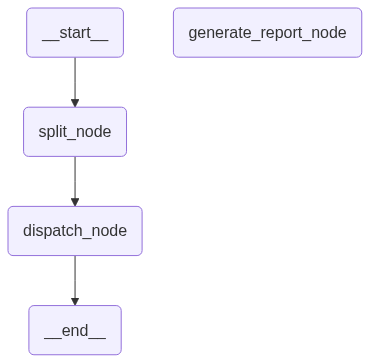

In [142]:
from langgraph.graph import StateGraph,START,END
from typing import Annotated
import operator
from typing_extensions import TypedDict
from langgraph.types import Send
from langchain_openai import ChatOpenAI

class TechReportState(TypedDict):
    source:dict
    intermediate_source:list
    partial_source:list
    subject:str
    intermediate_report:Annotated[list, operator.add]
    report:str

llm = ChatOpenAI(model=settings['id'],api_key=settings['api_key'],base_url=settings['base_url'],temperature=0.01)

graph_builder = StateGraph(TechReportState)

def split_node(data:TechReportState):
    result_dic = {}
    for item in data['source']:
        if item['firdl1'] not in result_dic:
            result_dic[item['firdl1']] = []
            result_dic[item['firdl1']].append(item)
        else:
            result_dic[item['firdl1']].append(item)
    return {'intermediate_source':result_dic}

def dispatch_node(data:TechReportState):
    return {'subject': list(data['intermediate_source'].keys())}

def generate_report_node(data):
    print(data['subject'])
    print(data['partial_source'])

    llm_response = llm.invoke([{'role':"system","content":system_message},{'role':'user',"content":f"当前主题是{data['subject']},提供的内容：{data['partial_source']}"}])

    partial_report = [{'subject':data['subject'],'report':llm_response.content}]

    return {'intermediate_report':partial_report}

graph_builder.add_node(split_node, "split_node")
graph_builder.add_node(dispatch_node, "dispatch_node")
graph_builder.add_node(generate_report_node, "generate_report_node")

graph_builder.add_edge(START,"split_node")
graph_builder.add_edge("split_node","dispatch_node")
def route_to_generate(state: TechReportState):
    keys = state['subject']
    return [Send("generate_report_node", {"subject": key, "partial_source": state['intermediate_source'][key]}) for key in keys]
graph_builder.add_conditional_edges("dispatch_node", route_to_generate)
graph_builder.add_edge("generate_report_node", END)

graph = graph_builder.compile()
graph

In [145]:
graph_result = graph.invoke({"source":result['data']})

科技攻关
[{'xh': 4, 'firdl2': '低碳钢铁冶金', 'NO': 2, 'firdl1': '科技攻关', 'gyear': '2025', 'id': '21be02ed1bc94aa9a6bd1b36fb784295', 'cont': '<p>\n\t1、湘钢烧结燃料风选中试试验装置，已完成带料设备调试\n</p>\n<p>\n\t2、完成了 150kg 褐铁矿尾矿磁化提质试验研究，制备出 TFe 含量 62%以上、Fe 回收率 92%以上的铁精矿产品\n</p>\n<p>\n\t3、签订湖北兴发集团龙马磷业 4 万 t/a 磷矿粉球团中试线项目协议。完成球团焙烧制度优化和过程脱硫试验的实验室研究\n</p>'}, {'xh': 5, 'firdl2': '矿产资源及新能源', 'NO': 2, 'firdl1': '科技攻关', 'gyear': '2025', 'id': '21be02ed1bc94aa9a6bd1b36fb784295', 'cont': '<p>\n\t1、目前正在福建马坑铁矿开展现场充填试验研究，指标良好，后续计划开展充填工业试验。\n</p>\n<p>\n\t2、本月主要开展铁硅分离，依托俄罗斯新利钢高纯铁精粉项目\n</p>\n<br />'}, {'xh': 6, 'firdl2': '减污降碳', 'NO': 2, 'firdl1': '科技攻关', 'gyear': '2025', 'id': '21be02ed1bc94aa9a6bd1b36fb784295', 'cont': '<p>\n\t1、针对 CFB+SCR 工艺组合式脱硫脱硝工艺，开展了催化剂配方的研制工作，目前新开发的一款配方在晋城钢铁稳定运行 20 天，转化率 75%以上，且再生可恢复活性\n</p>\n<p>\n\t2、中冶长天联合北京科技大学、中天钢铁集团组建了攻关团队，针对中天钢铁复杂煤气组分特征，开发出脱氯+水解 COS+吸收H2S 的技术路线\n</p>\n<p>\n\t3、与中科院大化所、中南大学开展了 CO2 原位热转化技术交流\n</p>'}]
智能技术与装备
[{'xh': 7, 'NO': 2, 'firdl1': '智能技术与装备', 'gyear': '2025', 'id': '21be02ed1bc94aa9

In [146]:
print(graph_result['intermediate_report'][2]['report'])



# “AI+”专项

## 外部“AI+”动态

1. 3 月 7 日，国务院相关部委发布《人工智能生成合成内容标识办法》，规范人工智能生成合成内容标识，将于今年 9 月实施；  
2. 中共中央政治局 4 月 25 日就加强人工智能发展和监管进行第二十次集体学习；  
3. 3 月 13 日，集团公司开展了《人工智能发展现状及 DeepSeek 应用技巧》培训；  
4. 3 月 17 日，集团公司开展了人工智能人才盘点工作。

## 内部“AI+”动态

### QUkr4oCd5LiT6aG55Z+56K6t

1. 4 月 30 日，人力资源部组织在全公司开展了《DeepSeek 赋能 AI 高效智慧办公》培训；  
2. 4 月，信息与数字化中心组织开展了人工智能、AI+Revit 二次开发等专项培训。

### QUkr566h55CG5pWw5a2X5YyW

1. 中冶长天 AI+数字化企业大脑完成人员信息场景建设，通过 HR、PM、OA 数据构建实时能力矩阵，智能匹配战略岗位缺口；  
2. 推进 AI+审计、AI+采购、AI+档案等专题建设；  
3. 信息中心结合人工智能大语言模型，开展了 AI 代理、AI 流程的应用验证工作。

### QUkr5bel56iL5pWw5a2X5YyW

1. AI+暖通设备选型应用上线，能快速、精准地匹配最优设备方案；  
2. 长天智能在新余钢铁针对构建烧结工艺数据中台进行研发。
